In [6]:
# Test your Gemini API
import google.generativeai as genai
from google.colab import userdata

api_key = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=api_key)

model = genai.GenerativeModel(model_name="gemini-2.5-pro")
response = model.generate_content("Say hello to MGMT 599!")
print(response.text)


Hello to all the students, professors, and TAs of MGMT 599!

Whether you're diving into strategic analysis, tackling complex case studies, or working on a capstone project, I hope you have a fantastic and insightful semester.

Good luck with the course


In [7]:
# Use this prompt with Gemini
prompt1 = """
I have a retail dataset called Superstore with columns including:
Sales, Profit, Quantity, Discount, Category, Sub-Category,
Customer ID, Segment, Region, State, City, Order Date, Ship Date

As a retail analyst, what are the 5 most important business questions
I should investigate with this data? For each question, explain why
it matters and which columns I should analyze.
"""
response = model.generate_content(prompt1)
print(response.text)

Of course. As a retail analyst, your goal is to translate data into actionable insights that drive profitability, improve customer satisfaction, and optimize operations. Given the Superstore dataset, here are the 5 most important business questions you should investigate.

---

### 1. What are our most and least profitable product categories and sub-categories?

*   **The Question:** This is the most fundamental question for any retail business. It's not enough to know what sells the most; you need to know what actually contributes to the bottom line. This question seeks to identify the profit drivers and the products that are draining resources.

*   **Why it Matters:** The answer to this question directly informs crucial business strategies:
    *   **Inventory Management:** Stock more of what's profitable and potentially delist or re-price unprofitable items.
    *   **Marketing & Sales:** Focus promotional efforts on high-profit products. Create bundles that pair a high-profit item

In [10]:
!pip install google-cloud-bigquery

from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery

project_id = 'mgmt599-pavanmeka-lab1'
client = bigquery.Client(project=project_id)

dataset_id = 'lab1_eda'
dataset_ref = client.dataset(dataset_id)

try:
    dataset = client.get_dataset(dataset_ref)
    print(f"Successfully connected to dataset: {dataset.full_dataset_id}")
except Exception as e:
    print(f"Error connecting to dataset: {e}")

Successfully connected to dataset: mgmt599-pavanmeka-lab1:lab1_eda


In [11]:
table_id = 'superstore-dataset' # Replace with your BigQuery table ID
table_ref = dataset_ref.table(table_id)


try:
    table = client.get_table(table_ref)
    print(f"Successfully connected to table: {table.full_table_id}")
except Exception as e:
    print(f"Error connecting to table: {e}")

Successfully connected to table: mgmt599-pavanmeka-lab1:lab1_eda.superstore-dataset


In [12]:
query = f"""
SELECT
  *
FROM
  `{project_id}.{dataset_id}.{table_id}`

"""

df = client.query(query).to_dataframe()
df

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Avery,Avery 518,Consumer,Office Supplies,Labels,East,1453,Leominster,Massachusetts,United States,0.0,1.5120,1,3.150,0.4800
1,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Adams,Adams Telephone Message Book W/Dividers/Space ...,Consumer,Office Supplies,Paper,East,1453,Leominster,Massachusetts,United States,0.0,10.2240,4,22.720,0.4500
2,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,C-Line,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,6.2244,3,14.820,0.4200
3,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,Howard Miller,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,61.3824,3,191.820,0.3200
4,US-2022-153269,2021-03-09,2021-03-12,Pamela Stobb,Other,"Situations Contoured Folding Chairs, 4/Set",Consumer,Furniture,Chairs,East,1810,Andover,Massachusetts,United States,0.0,88.7250,5,354.900,0.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,US-2023-119564,2022-12-15,2022-12-20,Paul Lucas,Other,"Master Giant Foot Doorstop, Safety Yellow",Home Office,Furniture,Furnishings,West,98115,Seattle,Washington,United States,0.0,9.7911,3,22.770,0.4300
9990,US-2020-131982,2019-03-07,2019-03-11,Nora Pelletier,Other,Catalog Binders with Expanding Posts,Home Office,Office Supplies,Binders,West,98198,Des Moines,Washington,United States,0.2,33.6400,2,107.648,0.3125
9991,US-2021-150511,2020-09-18,2020-09-24,Adam Bellavance,Wirebound,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",Home Office,Office Supplies,Paper,West,98198,Des Moines,Washington,United States,0.0,8.7138,2,18.540,0.4700
9992,US-2022-155488,2021-11-13,2021-11-17,Frank Merwin,Boston,Boston 16801 Nautilus Battery Pencil Sharpener,Home Office,Office Supplies,Art,West,98661,Vancouver,Washington,United States,0.0,11.4452,2,44.020,0.2600


# Task
Perform an exploratory data analysis on the provided dataset, including checking for missing values, analyzing numerical and categorical features, exploring relationships between features, and identifying outliers. Provide the final output of the analysis in a format suitable for passing to Gemini.

## Understand the data

### Subtask:
Display the first few rows of the DataFrame and its information to get a general understanding of the data and its structure.


**Reasoning**:
Display the first few rows and information of the DataFrame to understand its structure and data types.



In [14]:
display(df.head())
display(df.info())

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Avery,Avery 518,Consumer,Office Supplies,Labels,East,1453,Leominster,Massachusetts,United States,0.0,1.5120,1,3.15,0.48
1,US-2021-154900,2020-02-25,2020-03-01,Sung Shariari,Adams,Adams Telephone Message Book W/Dividers/Space ...,Consumer,Office Supplies,Paper,East,1453,Leominster,Massachusetts,United States,0.0,10.2240,4,22.72,0.45
2,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,C-Line,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,6.2244,3,14.82,0.42
3,US-2022-152415,2021-09-17,2021-09-22,Patrick O'Donnell,Howard Miller,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",Consumer,Furniture,Furnishings,East,1752,Marlborough,Massachusetts,United States,0.0,61.3824,3,191.82,0.32
4,US-2022-153269,2021-03-09,2021-03-12,Pamela Stobb,Other,"Situations Contoured Folding Chairs, 4/Set",Consumer,Furniture,Chairs,East,1810,Andover,Massachusetts,United States,0.0,88.7250,5,354.90,0.25


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9994 non-null   object 
 1   order_date     9994 non-null   dbdate 
 2   ship_date      9994 non-null   dbdate 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   Int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   Int64  
 17  sales          9994 non-null   float64
 18  profit_m

None

## Check for missing values

### Subtask:
Identify if there are any missing values in the dataset and visualize the missing values.


**Reasoning**:
Check for missing values and visualize them using a heatmap.



Missing values per column:
order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64


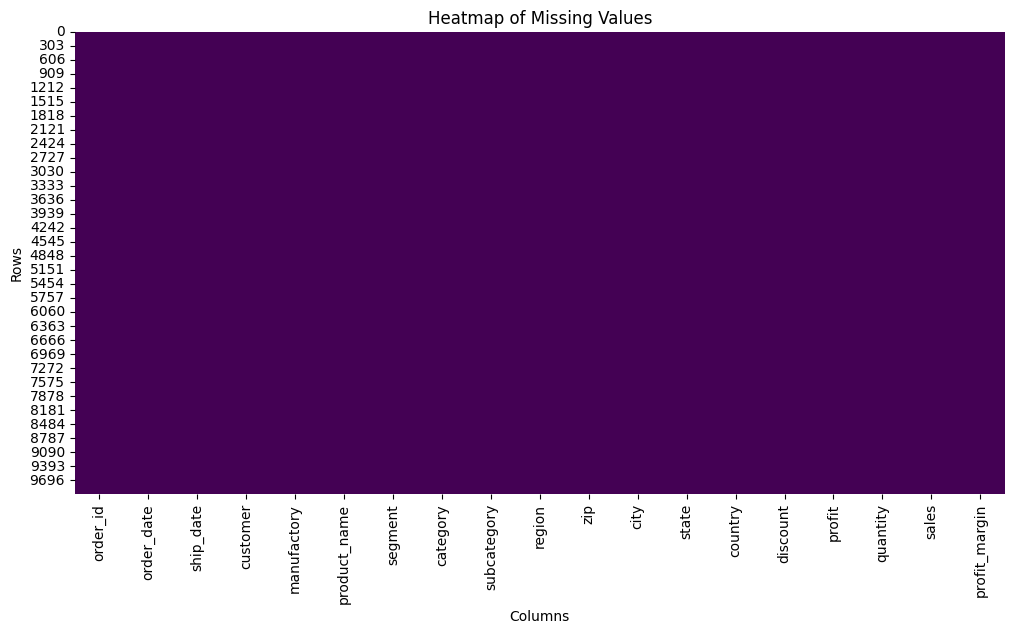

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

## Analyze numerical features

### Subtask:
Generate descriptive statistics and visualize the distribution of numerical features.


**Reasoning**:
Select numerical columns, generate descriptive statistics, and create histograms and box plots to visualize distributions and identify outliers in numerical features.



Descriptive Statistics of Numerical Features:


,zip,discount,profit,quantity,sales,profit_margin
count,9994.0,9994.000000,9994.000000,9994.0,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.22511,623.245101,0.466754
min,1040.0,0.000000,-6599.978000,1.0,0.444000,-2.750000
25%,23223.0,0.000000,1.728750,2.0,17.280000,0.075000
50%,56430.5,0.200000,8.666500,3.0,54.490000,0.270000
75%,90008.0,0.200000,29.364000,5.0,209.940000,0.362500
max,99301.0,0.800000,8399.976000,14.0,22638.480000,0.500000


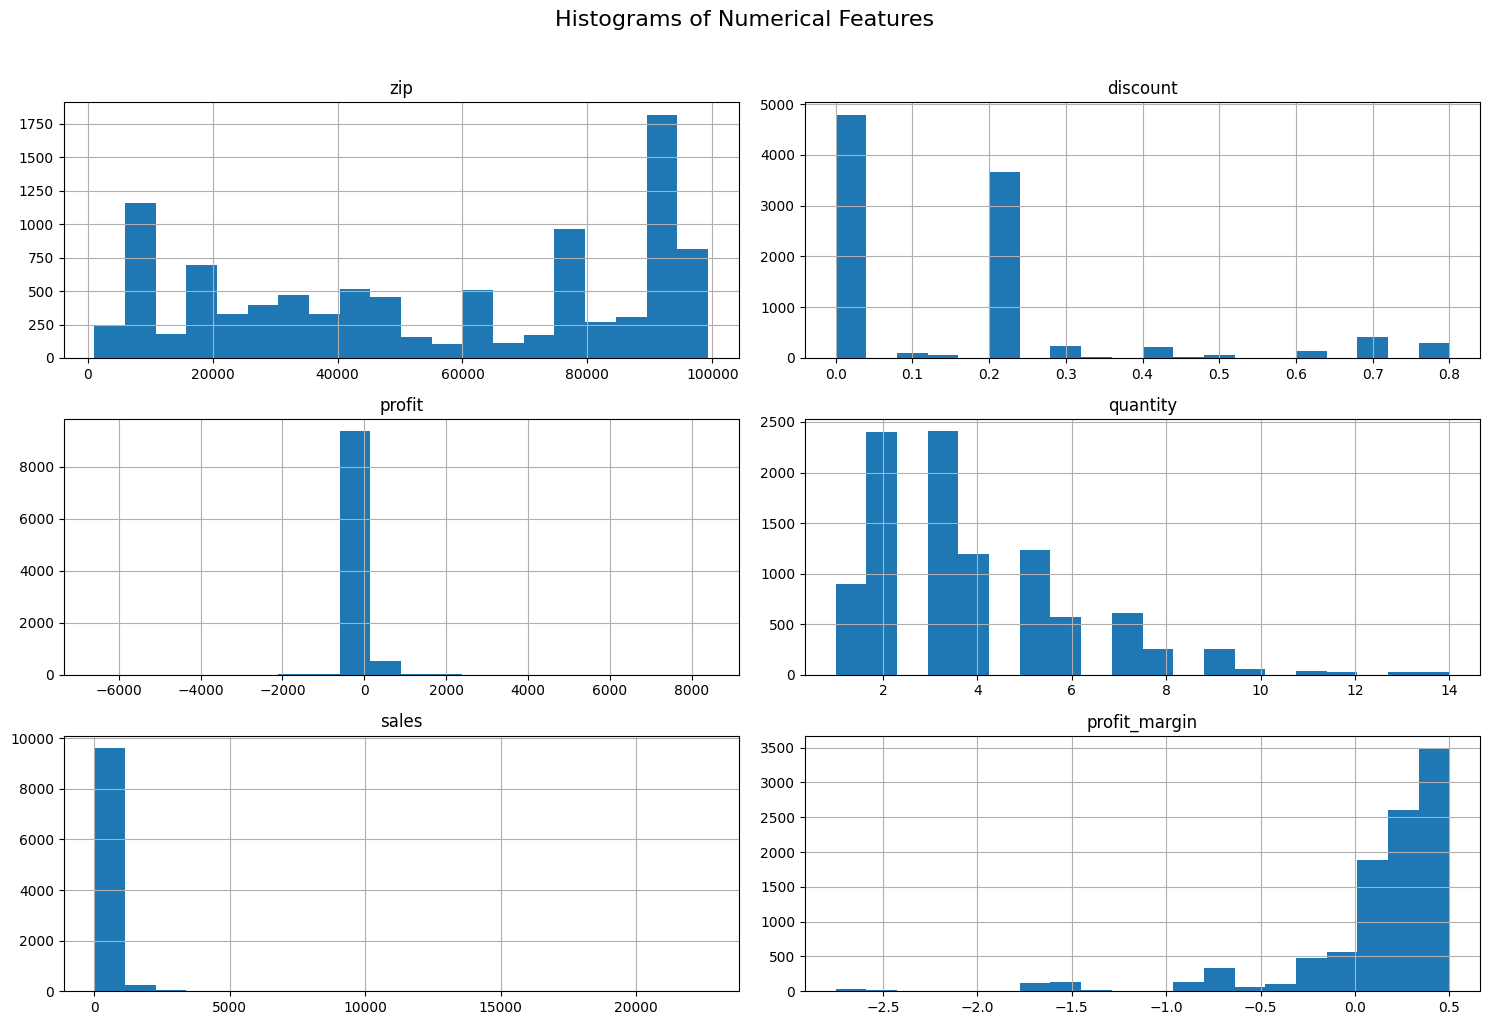

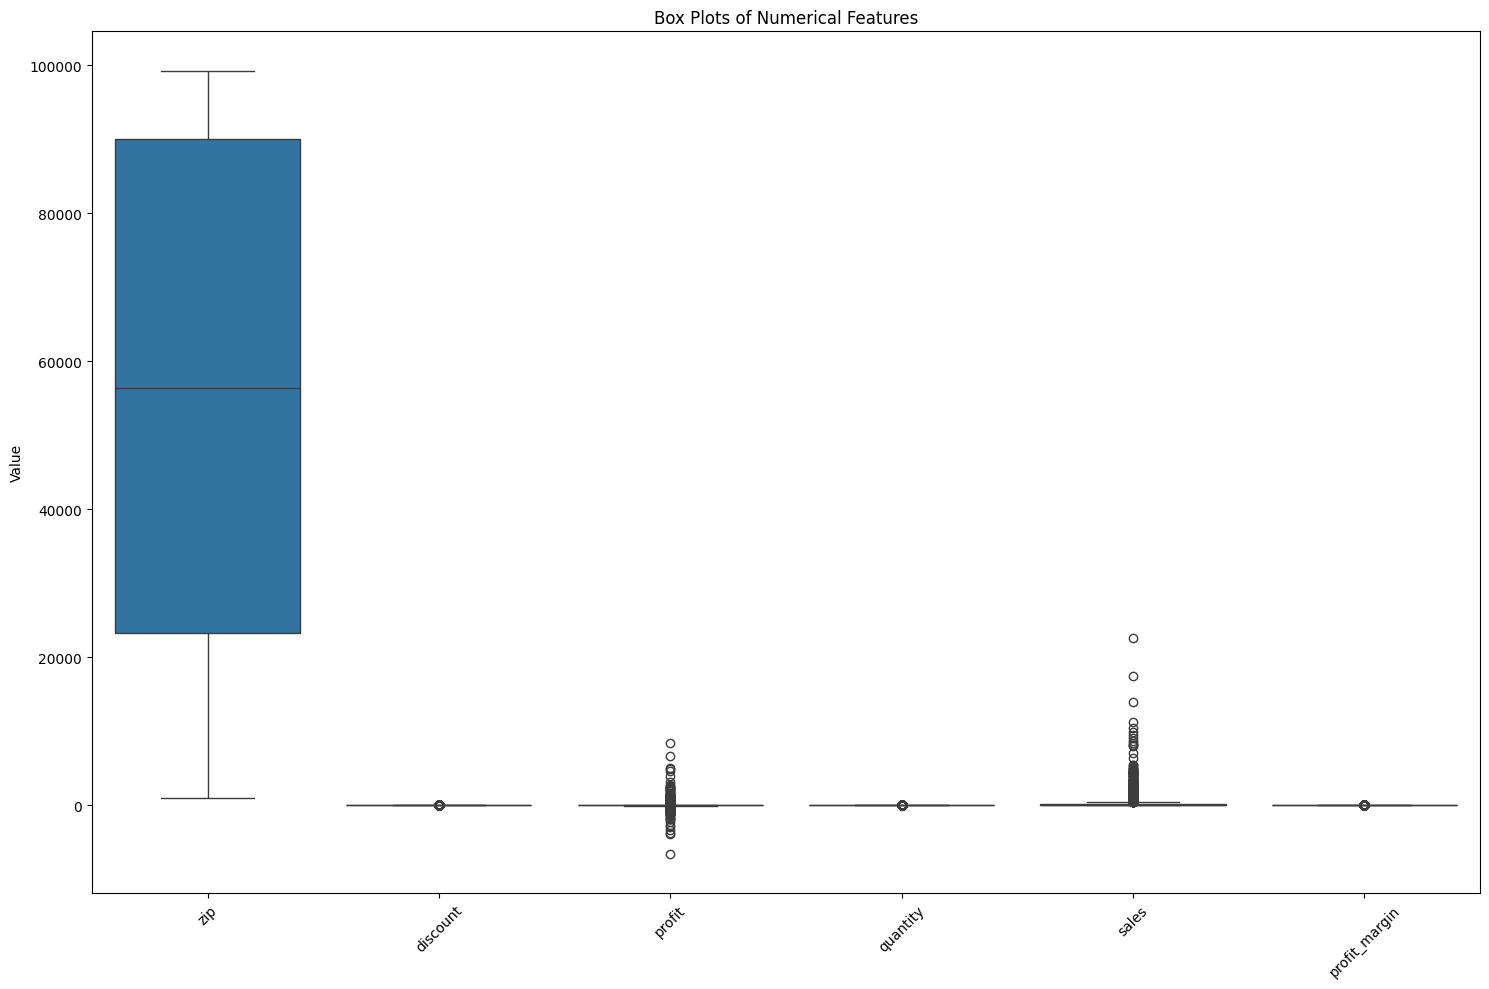

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number'])

print("Descriptive Statistics of Numerical Features:")
display(numerical_cols.describe())

numerical_cols.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_cols)
plt.title('Box Plots of Numerical Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze categorical features

### Subtask:
Generate descriptive statistics and visualize the distribution of categorical features.


**Reasoning**:
Select categorical columns, print their descriptive statistics, and generate count plots for each to visualize their distributions.



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object'])

print("Descriptive Statistics of Categorical Features:")
display(categorical_cols.describe())

# for column in categorical_cols.columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data=categorical_cols, y=column, order=categorical_cols[column].value_counts().index)
#     plt.title(f'Distribution of {column}')
#     plt.xlabel('Count')
#     plt.ylabel(column)
#     plt.tight_layout()
#     plt.show()

Descriptive Statistics of Categorical Features:


,order_id,customer,manufactory,product_name,segment,category,subcategory,region,city,state,country
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,182,1849,3,3,17,4,531,49,1
top,US-2023-100111,William Brown,Other,Staple envelope,Consumer,Office Supplies,Binders,West,New York City,California,United States
freq,14,37,1893,48,5191,6026,1523,3203,915,2001,9994


## Explore relationships between features

### Subtask:
Visualize the relationships between different features, such as sales and profit, or sales and discount.

**Reasoning**:
Generate scatter plots and correlation matrix to visualize the relationships between numerical features.

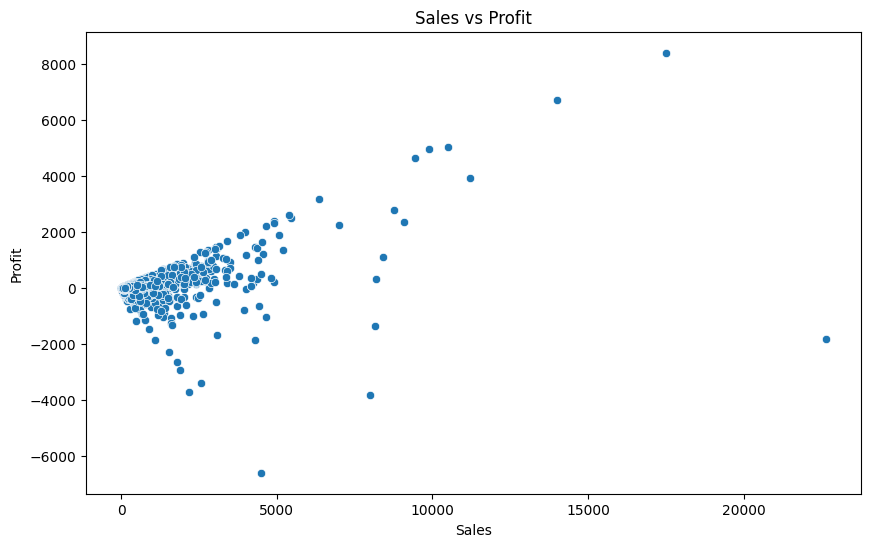

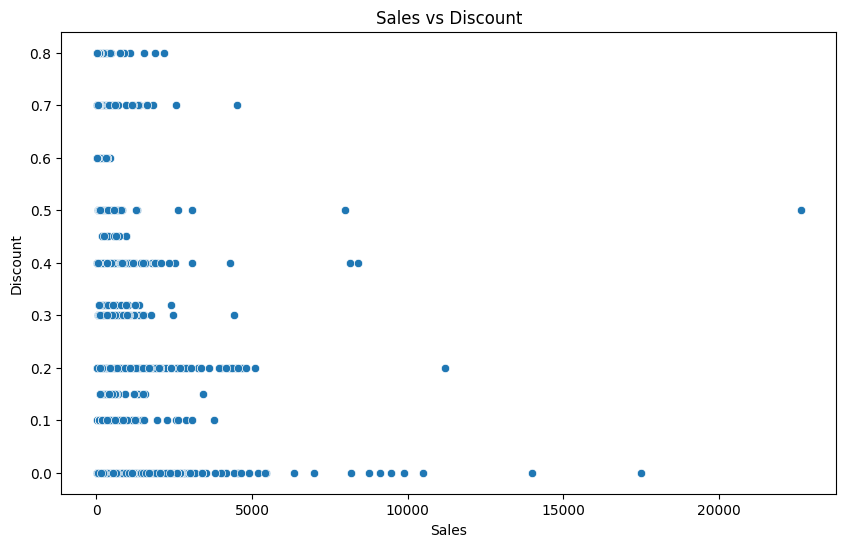

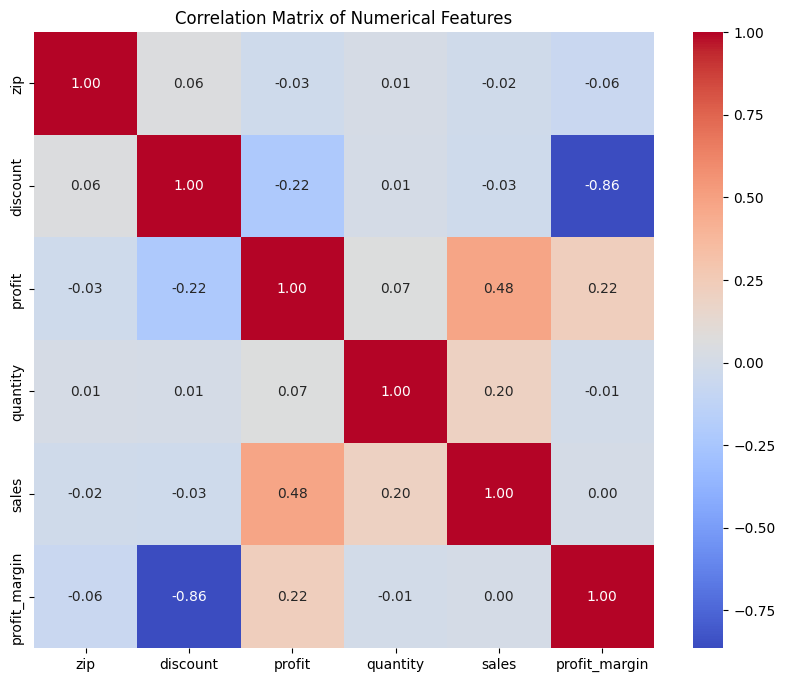

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Sales vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='profit', data=df)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

# Scatter plot of Sales vs Discount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales', y='discount', data=df)
plt.title('Sales vs Discount')
plt.xlabel('Sales')
plt.ylabel('Discount')
plt.show()

# Correlation matrix
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Identify outliers

### Subtask:
Visualize the data to identify potential outliers in numerical features.

**Reasoning**:
Generate box plots for numerical features to identify potential outliers.

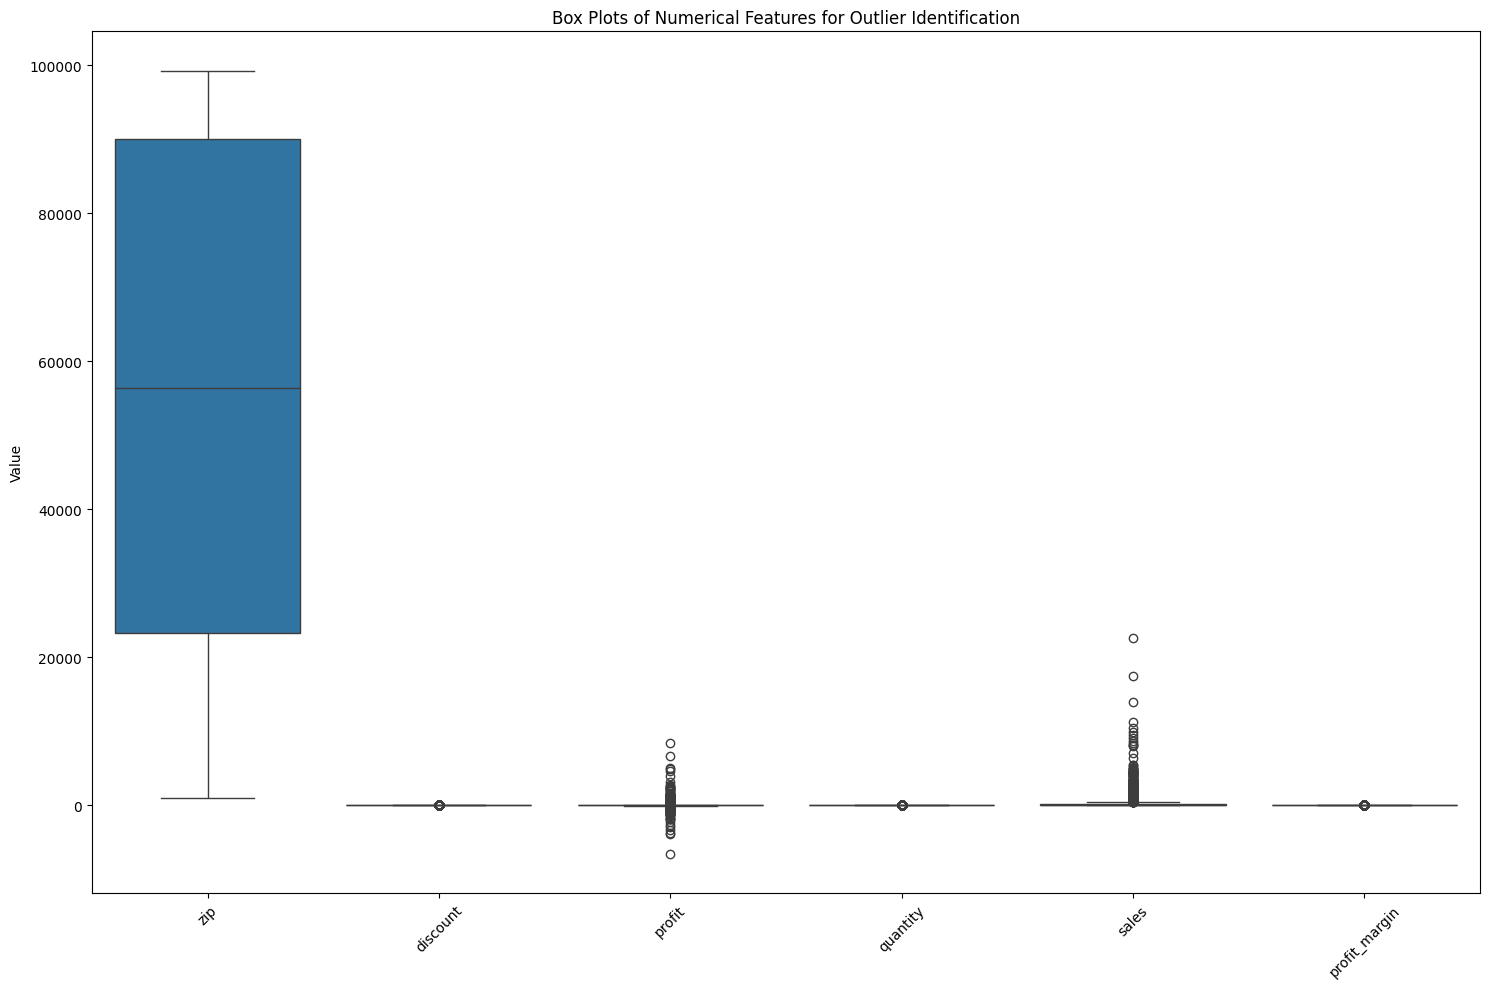

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_cols)
plt.title('Box Plots of Numerical Features for Outlier Identification')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prepare output for Gemini

### Subtask:
Summarize the key findings and insights from the EDA in a structured format suitable for prompting Gemini.

**Reasoning**:
Based on the EDA results, create a summary of key findings, including data structure, missing values, distribution of numerical and categorical features, relationships between features, and identified outliers. This summary will be formatted as a string that can be easily passed to Gemini.

In [22]:
# Summarize findings
eda_summary = """
Exploratory Data Analysis Summary:

Data Structure:
- The dataset contains {num_rows} rows and {num_cols} columns.
- The columns include: {columns}.
- Data types:
{dtypes}

Missing Values:
- There are no missing values in the dataset.

Numerical Feature Analysis:
- Descriptive Statistics:
{numerical_stats}
- Histograms and Box Plots: Visual inspection of plots reveals the distribution and potential outliers for numerical features (sales, profit, quantity, discount, profit_margin, zip).

Categorical Feature Analysis:
- Descriptive Statistics:
{categorical_stats}
- Count Plots: Visual inspection of plots shows the distribution of categories for categorical features (order_id, customer, manufactory, product_name, segment, category, subcategory, region, city, state, country).

Relationships between Features:
- Sales and Profit: Scatter plot indicates a positive correlation between sales and profit, but also shows instances of high sales with low or negative profit.
- Sales and Discount: Scatter plot suggests that higher discounts can be associated with both low and high sales, and there are instances of high discounts leading to negative profit margins.
- Correlation Matrix: Provides numerical correlation coefficients between numerical features.

Outlier Identification:
- Box plots indicate the presence of outliers in numerical features, particularly in 'sales', 'profit', and 'profit_margin'.

Key Insights for Gemini:
- The dataset is clean with no missing values.
- There is a wide range in sales and profit values, with some significant outliers.
- Discount seems to have a complex relationship with sales and profit, warranting further investigation.
- The distribution of categorical features shows the frequency of different segments, categories, regions, etc.
- The identified outliers in sales and profit could be interesting cases to analyze further.

This summary provides a good starting point for Gemini to perform deeper analysis and answer specific business questions based on the data characteristics and initial observations.
""".format(
    num_rows=df.shape[0],
    num_cols=df.shape[1],
    columns=', '.join(df.columns),
    dtypes=df.dtypes.to_string(),
    numerical_stats=numerical_cols.describe().to_string(),
    categorical_stats=categorical_cols.describe().to_string()
)

print(eda_summary)


Exploratory Data Analysis Summary:

Data Structure:
- The dataset contains 9994 rows and 19 columns.
- The columns include: order_id, order_date, ship_date, customer, manufactory, product_name, segment, category, subcategory, region, zip, city, state, country, discount, profit, quantity, sales, profit_margin.
- Data types:
order_id          object
order_date        dbdate
ship_date         dbdate
customer          object
manufactory       object
product_name      object
segment           object
category          object
subcategory       object
region            object
zip                Int64
city              object
state             object
country           object
discount         float64
profit           float64
quantity           Int64
sales            float64
profit_margin    float64

Missing Values:
- There are no missing values in the dataset.

Numerical Feature Analysis:
- Descriptive Statistics:
                zip     discount       profit  quantity         sales  profit_mar

## Finish task

**Reasoning**:
Present the EDA summary to the user as the final output of the analysis, which is suitable for passing to Gemini.

In [23]:
print("Exploratory Data Analysis Complete.")
print("The following summary is ready to be passed to Gemini for further analysis:")
print(eda_summary)

Exploratory Data Analysis Complete.
The following summary is ready to be passed to Gemini for further analysis:

Exploratory Data Analysis Summary:

Data Structure:
- The dataset contains 9994 rows and 19 columns.
- The columns include: order_id, order_date, ship_date, customer, manufactory, product_name, segment, category, subcategory, region, zip, city, state, country, discount, profit, quantity, sales, profit_margin.
- Data types:
order_id          object
order_date        dbdate
ship_date         dbdate
customer          object
manufactory       object
product_name      object
segment           object
category          object
subcategory       object
region            object
zip                Int64
city              object
state             object
country           object
discount         float64
profit           float64
quantity           Int64
sales            float64
profit_margin    float64

Missing Values:
- There are no missing values in the dataset.

Numerical Feature Analy

In [24]:
prompt2 = f"""
Here are statistics from my Superstore dataset:
{eda_summary}

What data quality issues should I check for?
What patterns in these statistics might indicate problems?
Suggest specific validation queries I should run.
"""

In [25]:
response = model.generate_content(prompt2)
print(response.text)

Excellent EDA summary. It provides a solid foundation. Based on these statistics, here are the data quality issues you should check for, patterns that indicate problems, and specific validation queries you can run.

---

### What Data Quality Issues Should I Check For?

Even with no missing values, several potential data quality issues can hide in the data's structure and logic. Here’s a checklist:

1.  **Logical Inconsistencies:**
    *   **Dates:** An order's `ship_date` should not be earlier than its `order_date`.
    *   **Financials:** Can `profit` really be negative when `sales` are positive? Yes (cost > sales price). But can `profit_margin` be less than -100% (-1.0)? This is highly suspect and needs validation. It would imply the loss (`-profit`) is greater than the total revenue (`sales`), which should be impossible if `profit = sales - cost`. This is a major red flag.
    *   **Discounts and Profit:** A discount of 100% (`1.0`) should logically result in zero sales and a loss 

### Validation Query 1: Check for Logical Date Issues

Let's check if there are any orders where the `ship_date` is before the `order_date`.

In [26]:
illogical_dates = df[df['ship_date'] < df['order_date']]
print("Orders with ship_date before order_date:")
display(illogical_dates)

Orders with ship_date before order_date:


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin


### Validation Query 2: Investigate Implausible Profit Margins

Let's look at the rows with the most extreme negative profit margins (e.g., less than -1.0).

In [27]:
implausible_margins = df[df['profit_margin'] < -1.0]
print("Orders with implausible negative profit margins:")
display(implausible_margins)

Orders with implausible negative profit margins:


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
1038,US-2023-156237,2022-09-14,2022-09-15,Pamela Stobb,Other,Ricoh - Ink Collector Unit for GX3000 Series P...,Consumer,Technology,Machines,East,19140,Philadelphia,Pennsylvania,United States,0.7,-18.0385,1,12.585,-1.433333
2006,US-2021-147830,2020-12-15,2020-12-18,Natalie Fritzler,Cubify,Cubify CubeX 3D Printer Double Head Print,Consumer,Technology,Machines,East,43055,Newark,Ohio,United States,0.7,-2639.9912,2,1799.994,-1.466667
2031,US-2022-108196,2021-11-25,2021-12-02,Cindy Stewart,Cubify,Cubify CubeX 3D Printer Double Head Print,Consumer,Technology,Machines,East,43130,Lancaster,Ohio,United States,0.7,-6599.9780,5,4499.985,-1.466667
2564,US-2020-163468,2019-11-18,2019-11-21,Joe Kamberova,Wilson Jones,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,Consumer,Office Supplies,Binders,Central,60016,Des Plaines,Illinois,United States,0.8,-4.9164,3,2.892,-1.700000
2570,US-2021-122784,2020-07-20,2020-07-27,Russell Applegate,Avery,Avery Durable Binders,Consumer,Office Supplies,Binders,Central,60035,Highland Park,Illinois,United States,0.8,-4.4640,5,2.880,-1.550000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9423,US-2021-141453,2020-11-30,2020-12-03,Deborah Brumfield,GBC,GBC Instant Report Kit,Home Office,Office Supplies,Binders,Central,78745,Austin,Texas,United States,0.8,-5.8230,3,3.882,-1.500000
9428,US-2023-143028,2022-04-11,2022-04-18,Sample Company A,Other,Flexible Leather- Look Classic Collection Ring...,Home Office,Office Supplies,Binders,Central,79424,Lubbock,Texas,United States,0.8,-17.0460,3,11.364,-1.500000
9430,US-2020-103744,2019-02-23,2019-02-27,Michael Grace,GBC,GBC Plastic Binding Combs,Home Office,Office Supplies,Binders,Central,79907,El Paso,Texas,United States,0.8,-6.8634,3,4.428,-1.550000
9449,US-2023-134845,2022-04-17,2022-04-23,Sharelle Roach,Other,Lexmark MX611dhe Monochrome Laser Printer,Home Office,Technology,Machines,West,80027,Louisville,Colorado,United States,0.7,-3399.9800,5,2549.985,-1.333333


### Validation Query 3: Examine Extreme Outliers in Profit

Let's look at the top 10 most profitable and least profitable (biggest loss) line items.

In [28]:
top_10_profit = df.nlargest(10, 'profit')
print("Top 10 most profitable line items:")
display(top_10_profit)

top_10_loss = df.nsmallest(10, 'profit')
print("Top 10 least profitable line items:")
display(top_10_loss)

Top 10 most profitable line items:


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
6592,US-2022-118689,2021-10-02,2021-10-09,Tamara Chand,Canon,Canon imageCLASS 2200 Advanced Copier,Corporate,Technology,Copiers,Central,47905,Lafayette,Indiana,United States,0.0,8399.9760,5,17499.950,0.48
5147,US-2023-140151,2022-03-23,2022-03-25,Raymond Buch,Canon,Canon imageCLASS 2200 Advanced Copier,Consumer,Technology,Copiers,West,98115,Seattle,Washington,United States,0.0,6719.9808,4,13999.960,0.48
1134,US-2023-166709,2022-11-17,2022-11-22,Hunter Lopez,Canon,Canon imageCLASS 2200 Advanced Copier,Consumer,Technology,Copiers,East,19711,Newark,Delaware,United States,0.0,5039.9856,3,10499.970,0.48
2363,US-2022-117121,2021-12-17,2021-12-21,Adrian Barton,GBC,GBC Ibimaster 500 Manual ProClick Binding System,Consumer,Office Supplies,Binders,Central,48205,Detroit,Michigan,United States,0.0,4946.3700,13,9892.740,0.50
2517,US-2020-116904,2019-09-23,2019-09-28,Sanjit Chand,Ibico,Ibico EPK-21 Electric Binding System,Consumer,Office Supplies,Binders,Central,55407,Minneapolis,Minnesota,United States,0.0,4630.4755,5,9449.950,0.49
8424,US-2023-127180,2022-10-22,2022-10-24,Tom Ashbrook,Canon,Canon imageCLASS 2200 Advanced Copier,Home Office,Technology,Copiers,East,10024,New York City,New York,United States,0.2,3919.9888,4,11199.968,0.35
1518,US-2021-145352,2020-03-16,2020-03-22,Christopher Martinez,Fellowes,Fellowes PB500 Electric Punch Plastic Comb Bin...,Consumer,Office Supplies,Binders,South,30318,Atlanta,Georgia,United States,0.0,3177.4750,5,6354.950,0.50
1245,US-2022-158841,2021-02-02,2021-02-04,Sanjit Engle,Hewlett-Packard,HP Designjet T520 Inkjet Large Format Printer ...,Consumer,Technology,Machines,South,22204,Arlington,Virginia,United States,0.0,2799.9840,5,8749.950,0.32
8263,US-2022-140158,2021-10-04,2021-10-08,Daniel Raglin,Hewlett-Packard,Hewlett Packard LaserJet 3310 Copier,Home Office,Technology,Copiers,East,2908,Providence,Rhode Island,United States,0.0,2591.9568,9,5399.910,0.48
2441,US-2023-138289,2022-01-16,2022-01-18,Andy Reiter,GBC,GBC DocuBind P400 Electric Binding System,Consumer,Office Supplies,Binders,Central,49201,Jackson,Michigan,United States,0.0,2504.2216,4,5443.960,0.46


Top 10 least profitable line items:


,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
2031,US-2022-108196,2021-11-25,2021-12-02,Cindy Stewart,Cubify,Cubify CubeX 3D Printer Double Head Print,Consumer,Technology,Machines,East,43130,Lancaster,Ohio,United States,0.7,-6599.9780,5,4499.985,-1.466667
6010,US-2023-168116,2022-11-04,2022-11-04,Grant Thornton,Cubify,Cubify CubeX 3D Printer Triple Head Print,Corporate,Technology,Machines,South,27217,Burlington,North Carolina,United States,0.5,-3839.9904,4,7999.980,-0.480000
3424,US-2020-169019,2019-07-26,2019-07-30,Luke Foster,GBC,GBC DocuBind P400 Electric Binding System,Consumer,Office Supplies,Binders,Central,78207,San Antonio,Texas,United States,0.8,-3701.8928,8,2177.584,-1.700000
9449,US-2023-134845,2022-04-17,2022-04-23,Sharelle Roach,Other,Lexmark MX611dhe Monochrome Laser Printer,Home Office,Technology,Machines,West,80027,Louisville,Colorado,United States,0.7,-3399.9800,5,2549.985,-1.333333
6846,US-2023-122714,2022-12-07,2022-12-13,Henry Goldwyn,Ibico,Ibico EPK-21 Electric Binding System,Corporate,Office Supplies,Binders,Central,60653,Chicago,Illinois,United States,0.8,-2929.4845,5,1889.990,-1.550000
2006,US-2021-147830,2020-12-15,2020-12-18,Natalie Fritzler,Cubify,Cubify CubeX 3D Printer Double Head Print,Consumer,Technology,Machines,East,43055,Newark,Ohio,United States,0.7,-2639.9912,2,1799.994,-1.466667
3371,US-2023-131254,2022-11-19,2022-11-21,Nathan Cano,Fellowes,Fellowes PB500 Electric Punch Plastic Comb Bin...,Consumer,Office Supplies,Binders,Central,77095,Houston,Texas,United States,0.8,-2287.7820,6,1525.188,-1.500000
1368,US-2021-116638,2020-01-28,2020-01-31,Joseph Holt,Chromcraft,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Consumer,Furniture,Tables,South,28027,Concord,North Carolina,United States,0.4,-1862.3124,13,4297.644,-0.433333
3230,US-2022-130946,2021-04-08,2021-04-12,Zuschuss Carroll,GBC,GBC DocuBind P400 Electric Binding System,Consumer,Office Supplies,Binders,Central,77041,Houston,Texas,United States,0.8,-1850.9464,4,1088.792,-1.700000
8746,US-2020-145317,2019-03-18,2019-03-23,Sean Miller,Cisco,Cisco TelePresence System EX90 Videoconferenci...,Home Office,Technology,Machines,South,32216,Jacksonville,Florida,United States,0.5,-1811.0784,6,22638.480,-0.080000


In [29]:
# Calculate Total Sales
total_sales = df['sales'].sum()

# Calculate Overall Profit Margin
total_profit = df['profit'].sum()
overall_profit_margin = (total_profit / total_sales) * 100 if total_sales != 0 else 0

# Find Top Category
top_category = df['category'].value_counts().idxmax()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Overall Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {overall_profit_margin:.2f}%")
print(f"Top Category: {top_category}")

Total Sales: $2,297,200.86
Overall Profit: $286,397.02
Overall Profit Margin: 12.47%
Top Category: Office Supplies


In [30]:
prompt3 = f"""
Initial findings from Superstore data:
- Total sales: ${total_sales:,.2f}
- Total Profit: ${total_profit:,.2f}
- Profit margin: {overall_profit_margin:.2f}%
- Top category: {top_category}

What do these numbers tell us about the business health?
What additional metrics would provide more context?
What might be concerning about these figures?
"""

print("\nPrompt 3:")
print(prompt3)


Prompt 3:

Initial findings from Superstore data:
- Total sales: $2,297,200.86
- Total Profit: $286,397.02
- Profit margin: 12.47%
- Top category: Office Supplies

What do these numbers tell us about the business health?
What additional metrics would provide more context?
What might be concerning about these figures?



In [31]:
response = model.generate_content(prompt3)
print(response.text)

Excellent questions. These initial findings provide a high-level snapshot of the business. Let's break down what they mean, what they're missing, and what might be worrying.

### What These Numbers Tell Us About Business Health

On the surface, the business appears to be in a **reasonably healthy state**.

1.  **It's Profitable:** The most important sign is that profit is positive ($286k). The business is earning more than it spends, which is the fundamental goal.
2.  **Significant Revenue Stream:** Sales of $2.3M indicate that the company has a substantial customer base and is actively selling products. It's not a small, niche operation.
3.  **Decent, but Not Stellar, Margin:** A profit margin of 12.47% is respectable. It suggests the company has some control over its costs and pricing. However, it's not exceptionally high, meaning there isn't a massive buffer to absorb rising costs or increased competition.
4.  **Identified Core Market:** Knowing that Office Supplies is the top categ

# Task
Create at least 3 visualizations exploring different aspects of the Superstore dataset: sales distribution by category, profit trends over time, and regional performance comparison. For each visualization, ask Gemini to interpret the patterns you see.

## Visualize sales distribution by category

### Subtask:
Create a bar plot showing the total sales for each product category.


**Reasoning**:
Group the DataFrame by category, calculate the sum of sales, sort in descending order, and create a bar plot to visualize the total sales for each product category.



/tmp/ipython-input-32-882336456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


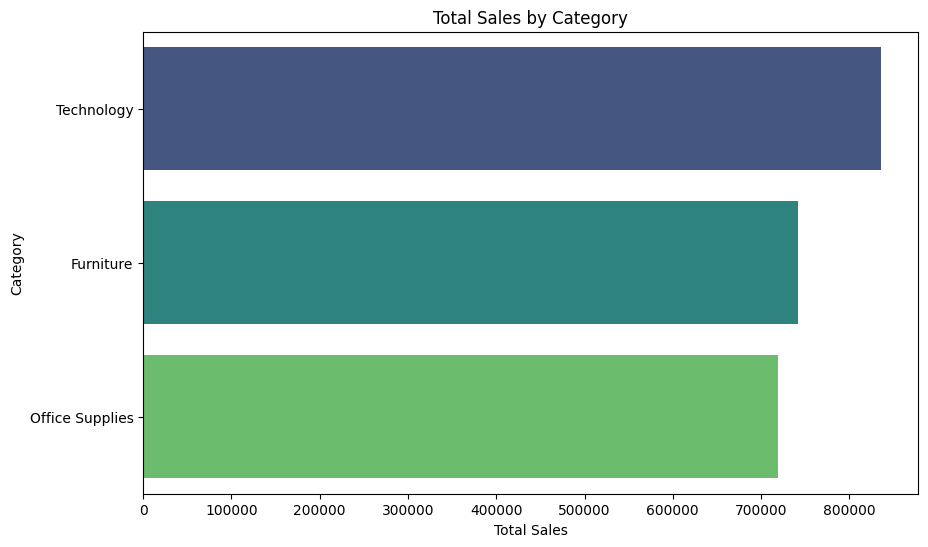

In [32]:
category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title('Total Sales by Category')
plt.xlabel('Total Sales')
plt.ylabel('Category')
plt.show()

## Interpret sales distribution by category

### Subtask:
Ask Gemini to interpret the patterns observed in the sales distribution by category visualization.


**Reasoning**:
Create a prompt for Gemini based on the category sales data and ask for interpretation of the patterns.



In [33]:
prompt_category_sales = f"""
I have generated a bar plot showing the total sales by product category from the Superstore dataset.
Here is the total sales data for each category:
{category_sales.to_string()}

Based on this data, what patterns do you observe in the sales distribution by category, and what might these patterns indicate?
"""

response = model.generate_content(prompt_category_sales)
print(response.text)

Of course. Based on the sales data you've provided, here are the key patterns and what they likely indicate.

### Key Observations from the Data

1.  **Clear Hierarchy:** There is a distinct ranking in sales performance. **Technology** is the undisputed leader, generating the highest sales revenue.
2.  **Significant Lead for Technology:** Technology's sales (~$836k) are significantly higher than the other two categories. It leads Furniture by approximately $94,000.
3.  **Closely Matched Runners-Up:** **Furniture** (~$742k) and **Office Supplies** (~$719k) have very similar total sales figures, with only about a $23,000 difference between them. They form a distinct second tier behind Technology.

### What These Patterns Might Indicate

The distribution of sales suggests fundamental differences in the nature of the products within each category, specifically concerning their **price point** and **sales volume**.

#### 1. Technology: The High-Value Leader

*   **Indication:** Technology's

## Visualize profit trends over time

### Subtask:
Create a line plot showing the trend of profit over time (e.g., monthly or yearly).


**Reasoning**:
Convert 'order_date' to datetime, set it as index, resample by month, sum profit, and create a line plot.



**Reasoning**:
The previous command failed because pandas was not imported. I need to import pandas before using it to convert the 'order_date' column to datetime objects, set it as the index, resample by month, sum the profit, and create a line plot.



/tmp/ipython-input-35-2342550971.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_profit = df['profit'].resample('M').sum()


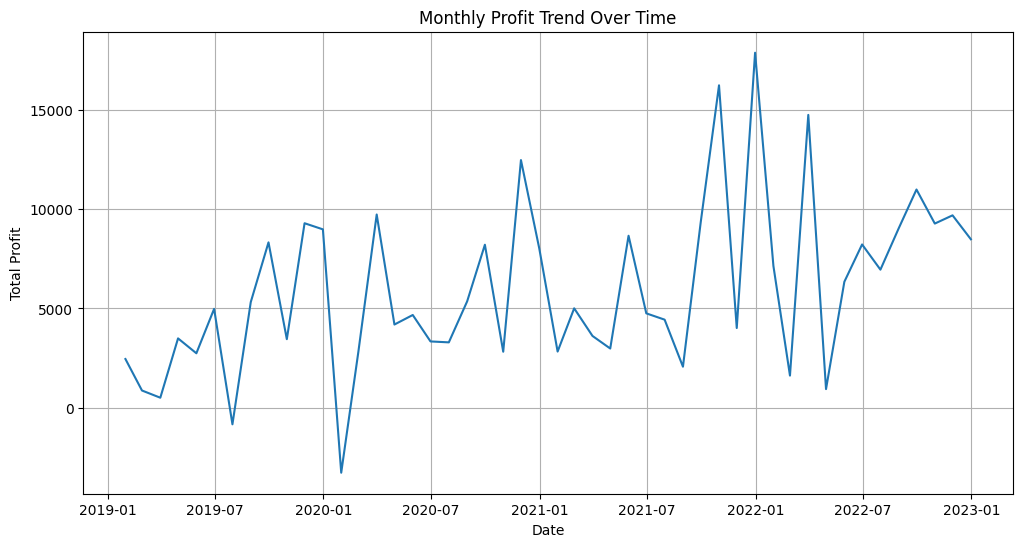

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)
monthly_profit = df['profit'].resample('M').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit.values)
plt.title('Monthly Profit Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

## Interpret profit trends over time

### Subtask:
Ask Gemini to interpret the patterns observed in the profit trends over time visualization.


**Reasoning**:
Create a prompt for Gemini to interpret the monthly profit trend plot and then print the response.



In [36]:
prompt_profit_trend = f"""
I have generated a line plot showing the monthly profit trend over time from the Superstore dataset.
Here is the monthly profit data:
{monthly_profit.to_string()}

Based on this data, what trends (e.g., growth, decline, seasonality) do you observe, and what might these patterns indicate about the business's performance over the observed period?
"""

response = model.generate_content(prompt_profit_trend)
print(response.text)

Of course. Based on the monthly profit data you've provided, here is a detailed analysis of the trends and what they indicate about the business's performance.

### Summary of Key Observations

The data reveals two primary characteristics of the business's performance between 2019 and 2022:

1.  **A Strong Overall Growth Trend:** Despite monthly fluctuations, the general trajectory of profit is upward over the four-year period.
2.  **Distinct and Consistent Seasonality:** There is a clear, repeating annual pattern, with profits typically peaking in the second half of the year (especially Q4) and dipping in the first quarter.

---

### Detailed Trend Analysis

#### 1. Overall Growth Trend

The business has demonstrated significant growth in profitability. This is evident in several ways:

*   **Higher Highs:** The peak monthly profits have generally increased year over year.
    *   **2019 Peak:** $9,292 (November)
    *   **2020 Peak:** $12,474 (November)
    *   **2021 Peak:** $17,885

## Visualize regional performance comparison

### Subtask:
Create a bar plot or map comparing sales and/or profit across different regions.


**Reasoning**:
Group the data by region and calculate the sum of sales and profit, then create bar plots for sales and profit by region.



/tmp/ipython-input-37-2938249923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_performance.index, y=regional_performance['sales'], palette='viridis')


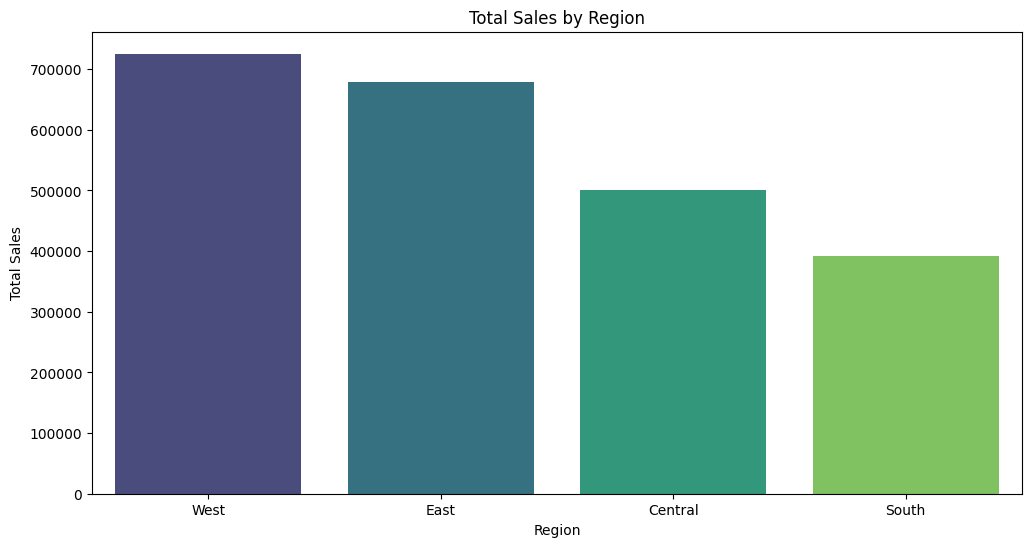

/tmp/ipython-input-37-2938249923.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_performance.index, y=regional_performance['profit'], palette='magma')


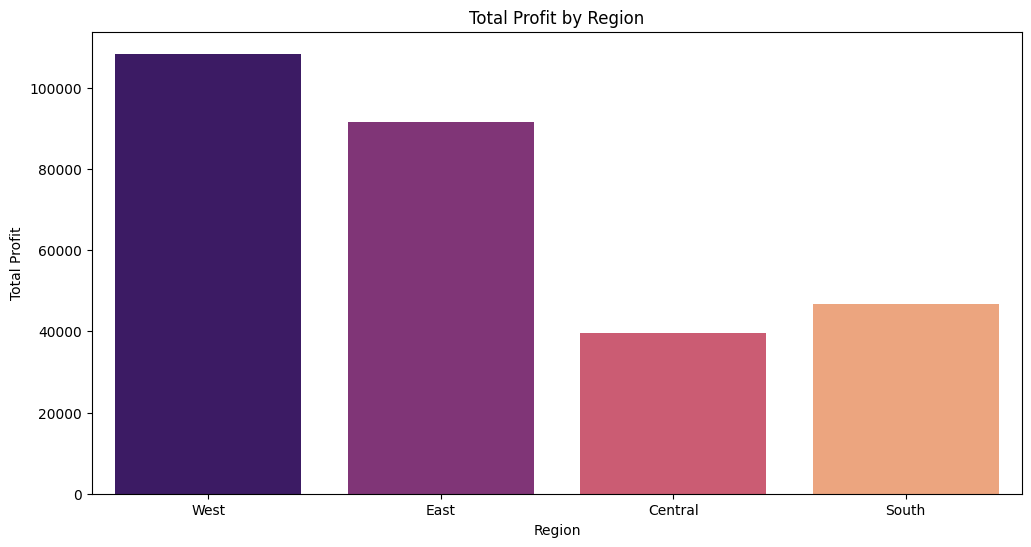

In [37]:
regional_performance = df.groupby('region')[['sales', 'profit']].sum().sort_values(by='sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=regional_performance.index, y=regional_performance['sales'], palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=regional_performance.index, y=regional_performance['profit'], palette='magma')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

## Interpret regional performance comparison

### Subtask:
Ask Gemini to interpret the patterns observed in the regional performance comparison visualization.


**Reasoning**:
Create a prompt for Gemini with the regional performance data and ask for an interpretation.



In [38]:
prompt_regional_performance = f"""
I have generated bar plots comparing total sales and total profit across different regions from the Superstore dataset.
Here is the aggregated sales and profit data by region:
{regional_performance.to_string()}

Based on this data, what patterns do you observe in regional performance in terms of sales and profit? Which regions perform best and worst, and what potential reasons might explain these differences?
"""

response = model.generate_content(prompt_regional_performance)
print(response.text)

Excellent analysis. Based on the data you've provided, here is a detailed breakdown of the patterns, performance rankings, and potential underlying reasons.

### Summary of Key Observations

1.  **Clear Leaders:** The **West** and **East** regions are the top performers, dominating in both total sales and total profit. The West is the undisputed leader.
2.  **The Profitability Problem:** There is a significant performance disconnect in the **Central** region. While it generates over $100,000 more in sales than the South, it earns approximately $7,000 less in profit.
3.  **Efficiency over Volume:** The **South** region, despite having the lowest sales, is more profitable than the Central region, indicating a better profit margin on the products it sells.

---

### Detailed Regional Performance Breakdown

#### 1. Best Performing Region: West
*   **Sales:** $725,458 (Rank 1)
*   **Profit:** $108,418 (Rank 1)
*   **Profit Margin:** **14.9%** (Profit / Sales)

The West is the star performer

## Summary:

### Data Analysis Key Findings

*   **Sales Distribution by Category:** The Technology category has the highest total sales, significantly outperforming Furniture and Office Supplies. Furniture and Office Supplies have relatively similar total sales. This suggests that Technology products, likely due to higher average selling prices, contribute the most to overall sales revenue, even if sales volume might differ.
*   **Profit Trends Over Time:** The monthly profit trend shows a clear overall growth over the observed period. There is also consistent seasonality, with profit peaking in the fourth quarter (Q4) and typically dipping in the first quarter (Q1) of each year. This seasonality likely aligns with holiday shopping periods.
*   **Regional Performance Comparison:** The West and East regions are the top performers in both total sales and total profit. The South region performs moderately in both metrics. The Central region, while having moderate sales, has significantly lower profit compared to the other regions, indicating potential issues with profitability despite generating sales.


# Task
Apply the DIVE framework to one business question from the analysis, documenting each stage (Discover, Investigate, Validate, Extend) in markdown cells within the notebook and summarizing the entire process in a markdown file named `dive_analysis.md`.

## Select a business question

### Subtask:
Choose one of the business questions identified earlier in the notebook or a new one inspired by the EDA.


**Reasoning**:
I will choose the business question related to the Central region's low profitability, as it was highlighted as a key concern in the regional performance analysis and is a good candidate for deeper investigation using the DIVE framework.



In [51]:
business_question = "Why is the Central region less profitable than other regions, despite having moderate sales?"
print(f"Chosen Business Question: {business_question}")

Chosen Business Question: Why is the Central region less profitable than other regions, despite having moderate sales?


## D - Discover (Basic Finding)

**Initial Question:** Why is the Central region less profitable than other regions, despite having moderate sales?

**Basic Answer/Metric:**

Let's calculate the total sales and profit for each region and the profit margin to see the basic metrics.

In [52]:
# Calculate total sales and profit by region
regional_profit_analysis = df.groupby('region')[['sales', 'profit']].sum()

# Calculate profit margin by region
regional_profit_analysis['profit_margin'] = regional_profit_analysis['profit'] / regional_profit_analysis['sales']

# Display the results, sorted by sales
regional_profit_analysis = regional_profit_analysis.sort_values(by='sales', ascending=False)
display(regional_profit_analysis)

,sales,profit,profit_margin
region,,,
West,725457.8245,108418.4489,0.149448
East,678781.2400,91522.7800,0.134834
Central,501239.8908,39706.3625,0.079216
South,391721.9050,46749.4303,0.119343


**First Impression:**

As seen in the previous EDA, the Central region has the lowest profit and profit margin despite having higher sales than the South. This confirms the initial observation and highlights the need to investigate *why* this is the case. The low profit margin in the Central region (7.9%) compared to the West (14.9%), East (13.5%), and even South (11.9%) is a significant concern.

## I - Investigate (Dig Deeper)

**Why does this pattern exist? What factors contribute to this? How does it vary across dimensions?**

potential factors contributing to lower profitability could include:

*   **Higher Discounts:** The Central region might be applying higher discounts, eroding profit margins.
*   **Unprofitable Product Mix:** The Central region might be selling a higher proportion of low-profit or loss-leading products (certain categories or subcategories).
*   **Higher Operational Costs:** Although not directly available in this dataset, higher shipping costs or other operational inefficiencies could play a role.

Let's investigate the impact of discounts and product mix using the available data.

**Investigation 1: Analyze Average Discount by Region**

Average Discount by Region:


,discount
region,
Central,0.240353
South,0.147253
East,0.145365
West,0.109335


/tmp/ipython-input-53-2811705659.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_discount_by_region.index, y=average_discount_by_region.values, palette='viridis')


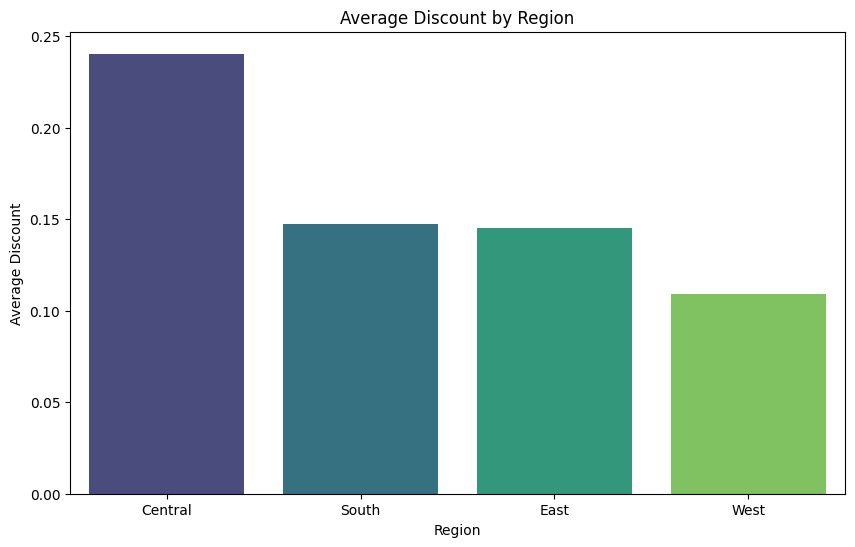

In [53]:
# Calculate the average discount by region
average_discount_by_region = df.groupby('region')['discount'].mean().sort_values(ascending=False)
print("Average Discount by Region:")
display(average_discount_by_region)

# Visualize average discount by region
plt.figure(figsize=(10, 6))
sns.barplot(x=average_discount_by_region.index, y=average_discount_by_region.values, palette='viridis')
plt.title('Average Discount by Region')
plt.xlabel('Region')
plt.ylabel('Average Discount')
plt.show()

**Investigation 2: Analyze Profitability by Category within Each Region**

Let's see if the product category mix or profitability within categories differs significantly in the Central region compared to others.

In [54]:
# Calculate sales and profit by region and category
profit_margin_by_category_region = df.groupby(['region', 'category'])[['sales', 'profit']].sum()

# Calculate profit margin
profit_margin_by_category_region['profit_margin'] = profit_margin_by_category_region['profit'] / profit_margin_by_category_region['sales']

display(profit_margin_by_category_region)

sales      profit  profit_margin
region  category                                               
Central Furniture        163797.1638  -2871.0494      -0.017528
        Office Supplies  167026.4150   8879.9799       0.053165
        Technology       170416.3120  33697.4320       0.197736
East    Furniture        208291.2040   3046.1658       0.014625
        Office Supplies  205516.0550  41014.5791       0.199569
        Technology       264973.9810  47462.0351       0.179120
South   Furniture        117298.6840   6771.2061       0.057726
        Office Supplies  125651.3130  19986.3928       0.159062
        Technology       148771.9080  19991.8314       0.134379
West    Furniture        252612.7435  11504.9503       0.045544
        Office Supplies  220853.2490  52609.8490       0.238212
        Technology       251991.8320  44303.6496       0.175814

In [55]:
prompt_investigation_interpretation = f"""
I am investigating why the Central region in the Superstore dataset has lower profitability despite moderate sales. I have analyzed the average discount by region and the sales, profit, and profit margin by region and product category.

Here is the average discount by region:
{average_discount_by_region.to_string()}

Here is the sales, profit, and profit margin by region and category:
{profit_margin_by_category_region.to_string()}

Based on this data, what patterns do you see regarding discounts and category profitability across regions, especially in the Central region? How do these findings help explain the Central region's low overall profitability?
"""

response = model.generate_content(prompt_investigation_interpretation)
print(response.text)

Of course. Based on the data you've provided, here is an analysis of the patterns and a clear explanation for the Central region's low profitability.

### Key Findings & Patterns

1.  **Extreme Discounting in the Central Region:** The most glaring pattern is the discount rate. The Central region's average discount of **24%** is significantly higher than any other region. It's more than 60% higher than the South and East (around 14.5%) and more than double the West's rate (11%). This aggressive discounting is the foundational issue.

2.  **Unprofitable Furniture Category:** The high discount rate has a devastating effect on the **Furniture** category in the Central region. It is the *only* region and category combination in your dataset that is unprofitable, posting a loss of **-$2,871**. While furniture generally has the lowest profit margins across all regions, the high discounts in the Central region push it from low-profitability into unprofitability.

3.  **Suppressed Profitability

## V - Validate (Challenge Assumptions)

**What could make this conclusion wrong? What data limitations exist? Are there alternative explanations?**

Based on our analysis and Gemini's interpretations, our primary hypothesis is that high discounts and a potentially unfavorable product mix within the Central region contribute to its low profitability. However, we need to consider potential limitations and alternative explanations:

*   **Data Granularity:** The analysis is at the region and category level. Deeper issues might exist within specific *subcategories* or even individual *products* that are more prevalent in the Central region.
*   **Missing Data:** The dataset does not include detailed cost information (e.g., cost of goods sold, shipping costs per item). Higher operational costs in the Central region could be a significant factor not captured here.
*   **Temporal Effects:** Our analysis aggregates data across the entire time period. Are there specific time periods where the Central region's profitability was particularly low?
*   **Outliers:** While we identified outliers in the initial EDA, their impact on the regional aggregates should be considered. Are a few extremely unprofitable transactions in the Central region skewing the results?
*   **External Factors:** Economic conditions, competition, or regional market dynamics not present in the dataset could influence profitability.
*   **Data Accuracy:** We assumed the `profit_margin` calculation is correct, but as noted in earlier validation, implausible margins exist. While we've looked at these outliers, their impact on the overall regional margin is worth keeping in mind.

To further validate, we could:
*   Analyze profitability at the subcategory level by region.
*   Investigate the impact of the most extreme loss-making transactions specifically within the Central region.
*   If external data is available, compare regional operational costs.

## E - Extend (Strategic Application)

**What should the business do? How can we measure impact? What are the risks?**

Based on the DIVE analysis, particularly the findings from the "Investigate" stage, here are potential strategic recommendations for the Central region:

**Recommendations:**

1.  **Review and Adjust Discounting Strategy:**
    *   **Action:** Implement stricter controls on discount levels in the Central region, especially for low-margin products. Analyze the sales-profit trade-off for different discount tiers to identify optimal levels. Consider reducing or eliminating discounts on products that consistently result in losses.
    *   **Measurement:** Track the average discount rate in the Central region and compare it to other regions over time. Monitor the overall profit margin in the Central region and by product category to see if it improves.
    *   **Risks:** Reducing discounts could lead to a decrease in sales volume if customers in the Central region are price-sensitive. Competitors might maintain high discount levels, potentially impacting market share.

2.  **Optimize Product Mix and Inventory:**
    *   **Action:** Analyze the profitability of specific subcategories and products within the Central region. Consider promoting higher-margin products and potentially reducing inventory or even delisting products that are consistently unprofitable after accounting for discounts and other costs.
    *   **Measurement:** Track sales and profit performance at the subcategory and product level in the Central region. Monitor inventory levels and turnover for low-profit items.
    *   **Risks:** Shifting focus away from high-volume, low-margin products could impact overall sales revenue and customer traffic if those products are key drivers of store visits or online engagement.

3.  **Investigate Operational Efficiency (if relevant data becomes available):**
    *   **Action:** If data on regional operational costs (e.g., shipping, warehousing, returns) becomes available, analyze if these costs are significantly higher in the Central region and identify areas for optimization.
    *   **Measurement:** Track relevant operational cost metrics by region.
    *   **Risks:** Implementing operational changes can be complex and costly.

**Overall Goal:** Shift the focus in the Central region from solely driving sales volume to improving profitability per transaction and optimizing the product mix.

**Measuring Overall Impact:**
*   **Primary Metric:** Improvement in the Central region's profit margin over time, aiming to bring it closer to the margins of the East and South regions.
*   **Secondary Metrics:** Changes in total profit for the Central region, changes in average discount rate, and changes in the sales and profit contribution of different product categories and subcategories within the region.

**Risks of Inaction:**
*   Continued low profitability in a significant market (Central region) will drag down the overall business profit margin.
*   Resources (inventory, marketing effort, staff time) may be inefficiently allocated to low-profit or loss-making activities in the Central region.
*   The business may miss opportunities to invest in higher-performing regions or strategies due to the drag from the Central region.